<table style="width:100%">
  <tr>
    <td><center style="font-size:500%;">Representação Distribuida de Palavras (Parte 2)</center></td>
    <td><img src="https://logodownload.org/wp-content/uploads/2015/02/puc-rio-logo.gif" width="100"/></td> 
  </tr>    
</table>

Msc. Cristian Muñoz V.

In [1]:
%%bash

wget https://github.com/fabiocorreacordeiro/wordEmbeddingsOG/raw/master/_corpus/PRH.zip
unzip PRH.zip

Archive:  PRH.zip
  inflating: PRH/20120904-MONOGRAFIA_0.txt  
  inflating: PRH/20121011-MONOGRAFIA_0 (1).txt  
  inflating: PRH/20121011-MONOGRAFIA_0 (2).txt  
  inflating: PRH/20121011-MONOGRAFIA_0.txt  
  inflating: PRH/20121011-TESEMSC_0 (1).txt  
  inflating: PRH/20121011-TESEMSC_0 (2).txt  
  inflating: PRH/20121011-TESEMSC_0.txt  
  inflating: PRH/20121015-TESEMSC_0.txt  
  inflating: PRH/20121105-MONOGRAFIA_0.txt  
  inflating: PRH/20121105-TESEMSC_0 (1).txt  
  inflating: PRH/20121105-TESEMSC_0.txt  
  inflating: PRH/20121107-TESEMSC_0.txt  
  inflating: PRH/20121113-TESEMSC_0.txt  
  inflating: PRH/20121119-TESEMSC_0.txt  
  inflating: PRH/20121130-MONOGRAFIA_0.txt  
  inflating: PRH/20121206-TESEDSC_1.txt  
  inflating: PRH/20121217-MONOGRAFIA_0.txt  
  inflating: PRH/20121220-MONOGRAFIA_0.txt  
  inflating: PRH/20130226-TESEMSC_0.txt  
  inflating: PRH/20130317-TESEDSC_0.txt  
  inflating: PRH/20130320-TESEMSC_0.txt  
  inflating: PRH/20130513-TESEMSC_0.txt  
  inflating: P

--2020-08-21 22:38:21--  https://github.com/fabiocorreacordeiro/wordEmbeddingsOG/raw/master/_corpus/PRH.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fabiocorreacordeiro/wordEmbeddingsOG/master/_corpus/PRH.zip [following]
--2020-08-21 22:38:21--  https://raw.githubusercontent.com/fabiocorreacordeiro/wordEmbeddingsOG/master/_corpus/PRH.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14893401 (14M) [application/zip]
Saving to: ‘PRH.zip’

     0K .......... .......... .......... .......... ..........  0% 7.31M 2s
    50K .......... .......... .......... .......... ..........  0% 15.6M 1s
   10

In [2]:
!unzip PRH.zip

Archive:  PRH.zip
replace PRH/20120904-MONOGRAFIA_0.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PRH/20121011-MONOGRAFIA_0 (1).txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import csv
import gensim
from itertools import groupby
from gensim.similarities import WmdSimilarity
from gensim.models import Word2Vec

nltk.download('punkt') 
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def read_files(filenames):
  lines = []
  # Lendo todos os documentos de texto
  for index,filename in enumerate(filenames):

      file = open(filename, 'r', encoding='utf-8')

      for line in file:

          # Remover espaços em branco 
          line = line.strip()

          # Pula linhas em branco
          if len(line) == 0:
              continue

          lines.append(line)

      if index % 10 ==0:
          print(".",end=" ")
  
  print("LEITURA COMPLETA!")
  
  text = " ".join(lines)
  
  return text

In [5]:
filenames =  glob.glob("PRH/*")

text = read_files(filenames)
text = nltk.word_tokenize(text , language='portuguese')
print("Tokenizando Completada!")

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . LEITURA COMPLETA!
Tokenizando Completada!


In [6]:
# Agrupamos por texto que se encontra entre 2 ponto.
sentences = [list(group) for k, group in groupby(text, lambda x: x == ".")\
                             if not k]

# Remove stopwords numbers and punctuation.

def preprocess(sentence):
  return [word for word in sentence\
                if word not in stop_words and word.isalpha()]

sentences = [preprocess(sentence) for sentence in sentences]

# Seleccionamos frases com dimensão entre 3 e 150 palavras.
sentences =  [sentence for sentence in sentences\
                        if len(sentence)>3 and len(sentence)<150]

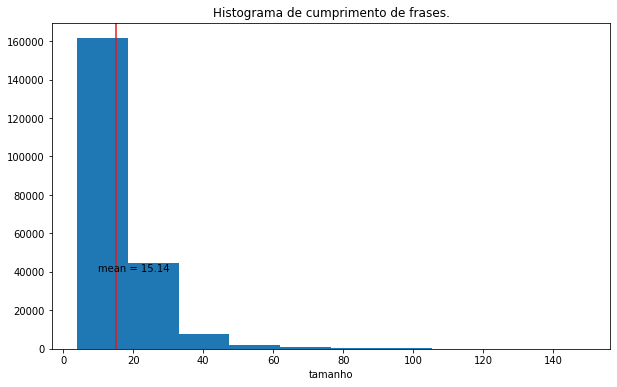

In [7]:
lens = [len(sentence) for sentence in sentences]
avg_len = sum(lens) / float(len(lens))

plt.figure(figsize=(10,6))
plt.hist([len(sentence) for sentence in sentences])
plt.axvline(avg_len, color='#e41a1c')
plt.title('Histograma de cumprimento de frases.')
plt.xlabel('tamanho')
plt.text(10, 40000, 'mean = %.2f' % avg_len)
plt.show()

In [8]:
# Treinamos Word2Vec com todos as frases
model = Word2Vec(sentences, workers=2, size=50)

# Calculamos a similaridade entre um conjunto de frases
num_best = 10
instance = WmdSimilarity(sentences[:1000], model, num_best=10)

In [9]:
text = 'muito obrigado'
sentence = nltk.word_tokenize(text.lower(), language='portuguese')
query = preprocess(sentence)
sims = instance[query]  # A query observa na classe de similaridade.

In [10]:
# Mostramos os resultado à da frase perguntada na celula anterior 
print('Query:')
print(text)
for i in range(num_best):
    print("")
    print('sim = %.4f' % sims[i][1])
    print(" ".join(sentences[sims[i][0]]))

Query:
muito obrigado

sim = 0.6610
Ao amado Guilherme apoio paciência carinho amor

sim = 0.6550
Agradeço oportunidade paciência conversas sempre agradáveis

sim = 0.6345
Aos orientadores Argimiro Secchi Luiz Fernando toda paciência dedicação ensinamentos

sim = 0.5955
Marcelo José Colaço DSc

sim = 0.5947
Ao Jean Vinícius Jorge Daniel Andrés Fabiana todos colegas graduação Laboratório Máquinas Térmicas convivência amizade

sim = 0.5946
iv Agradecimentos Ao orientador Albino Leiroz sabedoria atenção dedicação dentro sala aula

sim = 0.5879
Aprovado Albino José Kalab Leiroz PhD

sim = 0.5852
ii Aos pais Celso Lucia irmã Carolina amado Guilherme pessoas essenciais vida quais amor

sim = 0.5763
Flávio Marco Filho DSc

sim = 0.5729
Ao Marcelo José Colaço apoio Professor estrutura Coordenador


In [11]:
model.wv.most_similar('petróleo')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('petrolífera', 0.7335583567619324),
 ('natural', 0.7228753566741943),
 ('turbinas', 0.6580860614776611),
 ('petroquímica', 0.656402051448822),
 ('óleo', 0.6559079885482788),
 ('secundária', 0.6365934014320374),
 ('automobilística', 0.6349527835845947),
 ('hidrocarbonetos', 0.6257167458534241),
 ('maduros', 0.6235275268554688),
 ('exploração', 0.6166588068008423)]

In [12]:
tensor_file = 'word_tensor.w2v'
model.wv.save_word2vec_format(tensor_file)
key_vectors = gensim.models.KeyedVectors.load_word2vec_format(tensor_file, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [13]:
words_id = []
vectors = []
for word_id in key_vectors.index2word[:10000]:
    words_id.append(word_id)
    vectors.append(key_vectors[word_id])

In [14]:
def create_tensorboard_files(tensor_filename, vectors, metadatos, colnames=None):

    out_file_tsv      = tensor_filename + '_tensor.tsv'
    out_file_tsv_meta = tensor_filename + '_metadata.tsv'
    
    with open(out_file_tsv, 'w',encoding='utf-8') as f:   
        for vector in vectors:
            vector_str = "\t".join([str(x) for x in vector])
            f.write( vector_str + '\n')

    with open(out_file_tsv_meta, 'w',encoding='utf-8') as f:
        writer = csv.writer(f, delimiter='\t')
        if len(metadatos)>=2:
            if colnames is None:
                colnames = "\t".join([str(i) for i in range(len(metadatos))])
            writer.writerow(colnames)
            for metadato in zip(*metadatos):
                line = [str(x) for x in metadato]
                writer.writerow(line)
        else:
            for metadato in metadatos[0]:
                writer.writerow([metadato])
            
    print("Arquivo com o Tensor 2D foi salvado em: %s" % out_file_tsv)
    print("Arquivo com o Tensor de metadatos foi salvado em: %s" % out_file_tsv_meta)

In [15]:
metadatos=[words_id]
create_tensorboard_files(tensor_filename="word", 
                      vectors=vectors, 
                      metadatos=[words_id])

Arquivo com o Tensor 2D foi salvado em: word_tensor.tsv
Arquivo com o Tensor de metadatos foi salvado em: word_metadata.tsv


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Baixa os arquivos gerados e colocar em Tensoboard:


In [17]:
from google.colab import files
files.download('word_tensor.tsv')
files.download('word_metadata.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import tensorflow as tf
import datetime


In [19]:
!ls

drive  PRH.zip	    word_metadata.tsv  word_tensor.w2v
PRH    sample_data  word_tensor.tsv


In [20]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard